In [3]:
# !pip list
# !python -m pip install --upgrade pip
# !pip install --global-option=build_ext  --global-option="-IC:\Program Files\Graphviz\include" --global-option="-LC:\Program Files\Graphviz\lib" pygraphviz
# !pip install pygraphviz
# !pip install C:\Users\sgwya\OneDrive\Air_Python\c4b-slack-scraping\src\pygraphviz-1.7-cp39-cp39-win_amd64.whl

In [4]:
# import pygraphviz as pgv
#
# A = pgv.AGraph()
# # add some edges
# A.add_edge(1, 2)
# A.add_edge(2, 3)
# A.add_edge(1, 3)
# A.add_edge(3, 4)
# A.add_edge(3, 5)
# A.add_edge(3, 6)
# A.add_edge(4, 6)
# # make a subgraph with rank='same'
# B = A.add_subgraph([4, 5, 6], name="s1", rank="same")
# B.graph_attr["rank"] = "same"
#
# A.draw("test.png", prog="neato")

In [11]:
import pandas as pd

_df = pd.read_excel('src/集計.xlsx', header=0)
_df.head()


,検索結果数,抽出日時,thread_ts,投稿日,投稿時間,投稿チャンネル,投稿者,投稿メッセージ,リンク,リンク2,リンク3,リンク4,リンク5,リンク6
0,19,2022-07-05 17:44:47.894,https://code4biz.slack.com/archives/C036NJSDVN...,2022/03/13,00:48,02-いまにゅに相談,imanyu,がこのチャンネルの説明を「いまにゅに何でも相談してください！！\n学習やキャリア相談、プライ...,"<a target=""_blank"" href=""https://code4biz.slac...",NaN,NaN,NaN,NaN,NaN
1,19,2022-07-05 17:44:47.894,https://code4biz.slack.com/archives/C036NQRBV0...,2022/03/13,00:48,01-講義更新情報,imanyu,がこのチャンネルの説明を「教材や運営に関する更新情報を共有するチャンネルです！」に設定しました,"<a target=""_blank"" href=""https://code4biz.slac...",NaN,NaN,NaN,NaN,NaN
2,19,2022-07-05 17:44:47.894,https://code4biz.slack.com/archives/C036A0NPU1...,2022/03/13,00:49,01-いまにゅのつぶやき,imanyu,がこのチャンネルの説明を「いまにゅがただぼやくための場所です。遠慮なくコメントしていただけれ...,"<a target=""_blank"" href=""https://code4biz.slac...",NaN,NaN,NaN,NaN,NaN
3,19,2022-07-05 17:44:47.894,https://code4biz.slack.com/archives/C036ZNV6ZS...,2022/03/13,00:50,03-自己紹介,imanyu,がこのチャンネルの説明を「Slackに入りましたら是非自己紹介をお願いします\n」に設定しました,"<a target=""_blank"" href=""https://code4biz.slac...",NaN,NaN,NaN,NaN,NaN
4,19,2022-07-05 17:44:47.894,1647122414.551459,2022/03/13,07:00,03-自己紹介,松坂,はじめまして\n松坂（まつざか）と申します。\nPython歴:独学約3ヶ月\n（上記とは別...,"<a target=""_blank"" href=""https://code4biz.slac...",NaN,NaN,NaN,NaN,NaN


In [35]:
df = _df[['投稿者', '投稿メッセージ' ]]

In [42]:
# Slack投稿者のリスト作成
df_members = df['投稿者'].unique()
df_members

df_member_source = df_members[0]

df_source = df[df['投稿者'] == df_member_source]
df_source
# df.iloc[5, 1]

,投稿者,投稿メッセージ
0,imanyu,がこのチャンネルの説明を「いまにゅに何でも相談してください！！\n学習やキャリア相談、プライ...
1,imanyu,がこのチャンネルの説明を「教材や運営に関する更新情報を共有するチャンネルです！」に設定しました
2,imanyu,がこのチャンネルの説明を「いまにゅがただぼやくための場所です。遠慮なくコメントしていただけれ...
3,imanyu,がこのチャンネルの説明を「Slackに入りましたら是非自己紹介をお願いします\n」に設定しました
5,imanyu,@松坂\n\n自己紹介ありがとうございます！\n\nおぉ、よくわからぬままDjangoを触っ...
...,...,...
6097,imanyu,@kino\n\nkinoさんのレベルアップを感じる投稿でなんかめちゃくちゃ嬉しいです
6098,imanyu,しかも、SQLAlchemy のドキュメントは比較的読みにくい部類に入るので、なおさら素晴ら...
6129,imanyu,@Sagawa\n\nデザインの好みは分かれますよね
6131,imanyu,ありがとうございます\n\nサムネお願いしてる人はいつもと同じなんですけどね


In [44]:
df_member_target = df_members[11]
df_member_target



'佐川靖士'

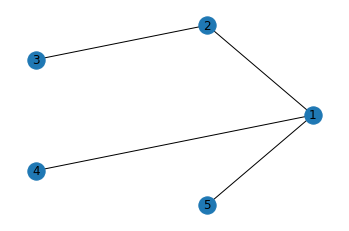

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# グラフ作成
G = nx.Graph()

# ノード追加
G.add_node(1)

# ノード追加（複数）
G.add_nodes_from([2, 3])

# エッジ追加
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

# エッジ追加（複数）
G.add_edges_from([(1, 4), (1, 5)])

# グラフ出力
fig = plt.figure()
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)
plt.axis("off")
fig.savefig("test.png")